# 乳癌資料庫預測SVM分類
>使用scikit-learn 機器學習套件裡的SVR演算法

* (一)引入函式庫及內建乳癌資料集<br>
引入之函式庫如下<br>
sklearn.datasets: 用來匯入內建之乳癌資料集`datasets.load_breast_cancer()`<br>
sklearn.SVR: 支持向量機回歸分析之演算法<br>
matplotlib.pyplot: 用來繪製影像

In [9]:
from sklearn import svm
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## Step1. 下載資料

In [13]:
breast_cancer=datasets.load_breast_cancer()


In [7]:
print(breast_cancer.keys())
print(breast_cancer.feature_names)
print(breast_cancer.target_names)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']


In [23]:
x = pd.DataFrame(breast_cancer.data, columns=breast_cancer['feature_names'])
x.head(10)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [24]:
y=pd.DataFrame(breast_cancer["target"], columns=['target'])

## Step2. 區分訓練集與測試集

In [30]:
training=pd.concat([x,y],axis=1)
training=training[["mean radius","mean texture","mean symmetry"]]
lable=y["target"]
training.head(10)

,mean radius,mean texture,mean symmetry
0,17.99,10.38,0.2419
1,20.57,17.77,0.1812
2,19.69,21.25,0.2069
3,11.42,20.38,0.2597
4,20.29,14.34,0.1809
5,12.45,15.70,0.2087
6,18.25,19.98,0.1794
7,13.71,20.83,0.2196
8,13.00,21.82,0.2350
9,12.46,24.04,0.2030


In [33]:
training.describe()

,mean radius,mean texture,mean symmetry
count,569.000000,569.000000,569.000000
mean,14.127292,19.289649,0.181162
std,3.524049,4.301036,0.027414
min,6.981000,9.710000,0.106000
25%,11.700000,16.170000,0.161900
50%,13.370000,18.840000,0.179200
75%,15.780000,21.800000,0.195700
max,28.110000,39.280000,0.304000


In [34]:
#normalization
training["mean radius"]=(training["mean radius"]-training["mean radius"].min())/\
(training["mean radius"].max()-training["mean radius"].min())#換行需多打\

training["mean texture"]=(training["mean texture"]-training["mean texture"].min())/\
(training["mean texture"].max()-training["mean texture"].min())#換行需多打\



In [35]:
training.head()

,mean radius,mean texture,mean symmetry
0,0.521037,0.022658,0.2419
1,0.643144,0.272574,0.1812
2,0.601496,0.390260,0.2069
3,0.210090,0.360839,0.2597
4,0.629893,0.156578,0.1809


In [53]:
x_train, x_test, y_train, y_test = train_test_split(training,lable,test_size=0.3)

In [44]:
x_test.shape

(171, 3)

## Step3. 建模

In [45]:
clf=svm.LinearSVC()
clf.fit(x_train,y_train)

LinearSVC()

## Step4. 預測

```

```


In [49]:
clf.predict(x_train)

array([1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,

## Step5. 準確度分析

In [48]:
print(clf.score(x_train,y_train))
print(clf.score(x_test, y_test))

0.9045226130653267
0.9005847953216374


## 取兩個特徵

In [51]:
training2=training[["mean radius","mean texture"]]
training2.head()

,mean radius,mean texture
0,0.521037,0.022658
1,0.643144,0.272574
2,0.601496,0.390260
3,0.210090,0.360839
4,0.629893,0.156578


In [54]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(training2,lable,test_size=0.3)

In [55]:
clf=svm.LinearSVC()
clf.fit(x_train2,y_train2)

LinearSVC()

In [63]:
print(clf.score(x_train2,y_train2))
print(clf.score(x_test2, y_test2))
x_train2.shape

0.8944723618090452
0.8538011695906432


(398, 2)

In [69]:
training_data=pd.concat([training2,y],axis=1)
benign=training_data[target==1]
benign.shape

(357, 3)

In [70]:
training_data=pd.concat([training2,y],axis=1)
malignant=training_data[target==0]
malignant.shape

(212, 3)

C:\Users\88693\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


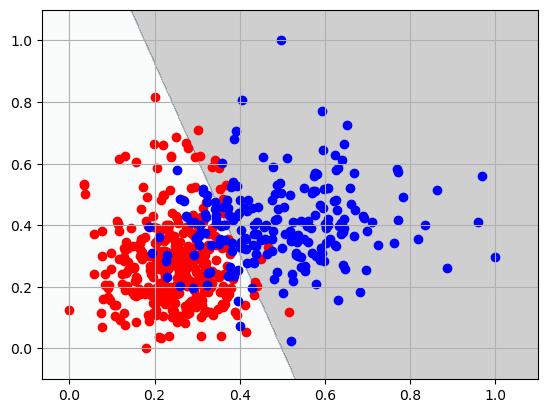

In [76]:




training_x_min=x_train2.values[:,0].min()-0.1
training_x_max=x_train2.values[:,0].max()+0.1
training_y_min=x_train2.values[:,1].min()-0.1
training_y_max=x_train2.values[:,1].max()+0.1
grid_interval=0.002
xx,yy=np.meshgrid(np.arange(training_x_min,training_x_max,grid_interval),np.arange(training_y_min,training_y_max,grid_interval))

Z=clf.predict(np.c_[xx.ravel(),yy.ravel()])#攤平
Z=Z.reshape(xx.shape)

plt.contourf(xx,yy,Z,cmap=plt.cm.bone,alpha=0.2)
plt.autoscale()
plt.grid()

plt.scatter(benign.values[:,0],benign.values[:,1],color='red')
plt.scatter(malignant.values[:,0],malignant.values[:,1],color='blue')
plt.show()